In [1]:
from helper import *
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [2]:
fo = pd.ExcelFile('cleaned2017.xls') 
# clean-data.xlsx
df = pd.read_excel(fo, 'Sheet1')
print(df)

                                                    text
0      manajemen jaringan komputer mikrotik router co...
1      rancang bangun keamanan jaringan wireless stip...
2      asesmen otentik pendukung desain instruksional...
3      implementasi intrusion detection system rule s...
4      pengembangan sistem pengamanan jaringan komput...
5      simulasi alat bantu pembelajaran topologi jari...
6      quality service jaringan internet metode hiera...
7      pemanfaatan telegram notifikasi serangan keper...
8      konfigurasi server cloud storage jaringan lan ...
9      implementasi controller access point system ma...
10     aplikasi e commerce web mobile industri konvek...
11     membangun aplikasi e library html php script m...
12     simulasi perancangan sistem jaringan inter vla...
13        optimasi jaringan local area network vlan voip
14     perancangan e commerce penjualan komputer alat...
15     zabbix network monitoring perangkat monitoring...
16     aplikasi pemantau perang

In [3]:
#drop empty line
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list[:1])

10264
[['manajemen', 'jaringan', 'komputer', 'mikrotik', 'router', 'computer', 'network', 'management', 'used', 'with', 'microtic', 'router']]


In [4]:
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs, minimum count 5 means only that appear 5 times or more.
bigram = Phrases(text_list, min_count=5)
trigram = Phrases(bigram[text_list], min_count=5)

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
            
print(text_list)

[['manajemen', 'jaringan', 'komputer', 'mikrotik', 'router', 'computer', 'network', 'management', 'used', 'with', 'microtic', 'router', 'jaringan_komputer', 'mikrotik_router', 'jaringan_komputer', 'mikrotik_router', 'jaringan_komputer', 'mikrotik_router'], ['rancang', 'bangun', 'keamanan', 'jaringan', 'wireless', 'stiper', 'sriwigama', 'palembang', 'radius', 'server', 'rancang_bangun', 'keamanan_jaringan', 'rancang_bangun', 'keamanan_jaringan', 'rancang_bangun', 'keamanan_jaringan'], ['asesmen', 'otentik', 'pendukung', 'desain', 'instruksional', 'jaringan', 'komputer', 'berstrategi', 'blended', 'learning', 'pendekatan', 'konstruktivistik', 'jaringan_komputer', 'blended_learning', 'jaringan_komputer', 'jaringan_komputer', 'blended_learning'], ['implementasi', 'intrusion', 'detection', 'system', 'rule', 'system', 'sniffer', 'mode', 'jaringan', 'lokal', 'intrusion_detection', 'intrusion_detection', 'rule_system', 'intrusion_detection'], ['pengembangan', 'sistem', 'pengamanan', 'jaringan',

In [5]:
phrasedf = pd.DataFrame(text_list)
print(phrasedf)

                 0              1             2             3              4   \
0         manajemen       jaringan      komputer      mikrotik         router   
1           rancang         bangun      keamanan      jaringan       wireless   
2           asesmen        otentik     pendukung        desain  instruksional   
3      implementasi      intrusion     detection        system           rule   
4      pengembangan         sistem    pengamanan      jaringan       komputer   
5          simulasi           alat         bantu  pembelajaran       topologi   
6           quality        service      jaringan      internet         metode   
7       pemanfaatan       telegram    notifikasi      serangan      keperluan   
8       konfigurasi         server         cloud       storage       jaringan   
9      implementasi     controller        access         point         system   
10         aplikasi              e      commerce           web         mobile   
11        membangun       ap

In [6]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=1, no_above=0.5)
print(dictionary)

Dictionary(12855 unique tokens: ['computer', 'jaringan', 'jaringan_komputer', 'komputer', 'management']...)


In [7]:
#build bag of words (corpus)
bow = [dictionary.doc2bow(doc) for doc in text_list]

print(len(bow))
# print(doc_term_matrix[100])

# calculate TF-IDF
tfidf = models.TfidfModel(bow)
corpus_tfidf = tfidf[bow]
# similarity = pd.DataFrame(corpus_tfidf, columns=['Topic']).to_csv("similarity.csv")

# print(corpus_tfidf)

# feature_names = tfidf.get_feature_names()
# corpus_index = [n for n in corpus_tfidf]

# showme = pd.DataFrame(tfs.T.todense(), index=feature_names, columns=corpus_index)
# print(showme)

# for i in corpus_tfidf:
#     result = pd.DataFrame()
#     result = result.append(pd.Series(corpus_tfidf), ignore_index=True)
#     print(result)

10264


In [8]:
import numpy as np
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    np.random.seed(9)
    model_list = []
    num_topics = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

# num_topics

In [9]:
start=2
limit=20
step=2
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)

In [10]:
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 10))

Num Topics = 2  has Coherence Value of 0.2540466903
Num Topics = 4  has Coherence Value of 0.4304278543
Num Topics = 6  has Coherence Value of 0.4032932332
Num Topics = 8  has Coherence Value of 0.425928889
Num Topics = 10  has Coherence Value of 0.5184516714
Num Topics = 12  has Coherence Value of 0.5044954914
Num Topics = 14  has Coherence Value of 0.5311408321
Num Topics = 16  has Coherence Value of 0.5363453498
Num Topics = 18  has Coherence Value of 0.5528565097


In [12]:
from pprint import pprint

model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=18)
pprint(model.print_topics())

[(0,
  '0.030*"informasi_penjualan" + 0.018*"metode_simple" + '
  '0.017*"additive_weighting" + 0.016*"smk_negeri" + 0.013*"pengamanan_file" + '
  '0.012*"penjualan" + 0.010*"kinerja_manajerial" + 0.010*"jaringan_komputer" '
  '+ 0.009*"additive" + 0.008*"metode_simple_additive_weighting"'),
 (1,
  '0.022*"sumber_daya" + 0.013*"sistem_pendukung" + 0.011*"virtual_private" + '
  '0.010*"peserta_didik" + 0.010*"metode_weighted" + 0.009*"rumah_sakit" + '
  '0.008*"kelas_xi" + 0.007*"daya" + 0.007*"laporan" + 0.007*"pengamanan"'),
 (2,
  '0.010*"hasil_belajar" + 0.008*"intrusion_detection" + '
  '0.008*"sekolah_tinggi" + 0.008*"sistem_pakar" + 0.008*"pengolahan_citra" + '
  '0.007*"anak_usia" + 0.007*"metode_forward" + 0.006*"belajar" + '
  '0.006*"motivasi_belajar" + 0.006*"komputer"'),
 (3,
  '0.016*"rumah_sakit" + 0.014*"cloud_computing" + '
  '0.011*"mendiagnosa_penyakit" + 0.011*"saw" + 0.011*"game_edukasi" + '
  '0.009*"sistem_pakar" + 0.008*"kabupaten_pringsewu" + '
  '0.008*"pembuat

In [13]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=18)

for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"kriptografi" + 0.011*"informasi_akuntansi" + 0.010*"blowfish" + 0.009*"hash" + 0.009*"bahasa_pemrograman" + 0.008*"variabel" + 0.008*"persediaan_barang" + 0.007*"pengenalan_huruf" + 0.007*"enkripsi_dekripsi" + 0.007*"adleman"
Topic: 1 Word: 0.020*"sistem_pakar" + 0.018*"end_file" + 0.017*"metode_certainty" + 0.011*"perlindungan_hukum" + 0.011*"mendiagnosa_penyakit" + 0.009*"end" + 0.008*"pakar" + 0.008*"internet_things" + 0.007*"institut_teknologi" + 0.007*"file"
Topic: 2 Word: 0.011*"teks" + 0.009*"pemerintah_daerah" + 0.009*"self_efficacy" + 0.008*"sma_negeri" + 0.008*"studi_kasus" + 0.007*"lkp_rancang" + 0.006*"mengamankan" + 0.006*"evaluasi" + 0.006*"terpadu" + 0.006*"pegawai"
Topic: 3 Word: 0.012*"sistem_pendukung" + 0.009*"merancang" + 0.009*"politeknik_caltex" + 0.008*"aes" + 0.007*"multimedia_interaktif" + 0.007*"motivasi_belajar" + 0.007*"administrasi_kependudukan" + 0.006*"keputusan_pemberian" + 0.006*"kebijakan" + 0.006*"situs"
Topic: 4 Word: 0.015*"per

# Dominant topic and its percentage contribution in each document

In [14]:
def format_topics_sentences(ldamodel=None, corpus=bow, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        # check notes 28/9
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(model, corpus=bow, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['No_Dokumen', 'Topik_Dominan', 'Persentase_Kontribusi', 'Kata_Kunci', 'Teks']
df_dominant_topic.head(247)

,No_Dokumen,Topik_Dominan,Persentase_Kontribusi,Kata_Kunci,Teks
0,0,11.0,0.8863,"metode_forward, diagnosa_penyakit, smk_negeri,...","[manajemen, jaringan, komputer, mikrotik, rout..."
1,1,13.0,0.5619,"keamanan_jaringan, keamanan, least_significant...","[rancang, bangun, keamanan, jaringan, wireless..."
2,2,12.0,0.3458,"raspberry_pi, bahan_baku, jaringan_komputer, e...","[asesmen, otentik, pendukung, desain, instruks..."
3,3,15.0,0.5716,"informasi_penjualan, rancang_bangun, penjualan...","[implementasi, intrusion, detection, system, r..."
4,4,12.0,0.9274,"raspberry_pi, bahan_baku, jaringan_komputer, e...","[pengembangan, sistem, pengamanan, jaringan, k..."
5,5,10.0,0.6990,"rumah_sakit, sumber_daya, informasi_akademik, ...","[simulasi, alat, bantu, pembelajaran, topologi..."
6,6,7.0,0.4541,"mata_kuliah, rancang_bangun, sistem_pendukung,...","[quality, service, jaringan, internet, metode,..."
7,7,15.0,0.5569,"informasi_penjualan, rancang_bangun, penjualan...","[pemanfaatan, telegram, notifikasi, serangan, ..."
8,8,13.0,0.6312,"keamanan_jaringan, keamanan, least_significant...","[konfigurasi, server, cloud, storage, jaringan..."
9,9,2.0,0.9650,"teks, pemerintah_daerah, self_efficacy, sma_ne...","[implementasi, controller, access, point, syst..."


In [15]:
# Generate dataframe from list and write to xlsx.
pd.DataFrame(df_dominant_topic, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']).to_excel('topics.xls', header=True, index=False)

In [16]:
count_topics = df_dominant_topic['Topik_Dominan'].value_counts()
count_topics

7.0     971
11.0    954
9.0     792
10.0    770
15.0    696
1.0     681
12.0    570
6.0     532
2.0     499
0.0     497
14.0    493
4.0     482
3.0     454
16.0    448
17.0    388
13.0    383
5.0     354
8.0     300
Name: Topik_Dominan, dtype: int64

In [17]:
# matplotlib inline

Text(0.5,1,'Persebaran Banyak Judul Penelitian Berdasarkan Topik')

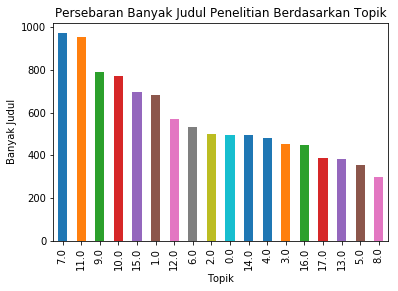

In [18]:
count_topics.plot.bar()

plt.xlabel('Topik')
plt.ylabel('Banyak Judul')
plt.title('Persebaran Banyak Judul Penelitian Berdasarkan Topik')

# The most representative sentence for each topic

In [19]:
# Display setting to show more characters in column
# Mallet
pd.options.display.max_colwidth = 100

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9589,"kriptografi, informasi_akuntansi, blowfish, hash, bahasa_pemrograman, variabel, persediaan_baran...","[pendugaan, tinggi, pasang, surut, laut, harian, jaringan, syaraf, tiruan, metode, backpropagati..."
1,1.0,0.9550,"sistem_pakar, end_file, metode_certainty, perlindungan_hukum, mendiagnosa_penyakit, end, pakar, ...","[perancangan, aplikasi, sistem, pakar, metode, certainty, factor, jenis, gangguan, disleksia, we..."
2,2.0,0.9650,"teks, pemerintah_daerah, self_efficacy, sma_negeri, studi_kasus, lkp_rancang, mengamankan, evalu...","[implementasi, controller, access, point, system, manager, capsman, wireless, distribution, syst..."
3,3.0,0.9550,"sistem_pendukung, merancang, politeknik_caltex, aes, multimedia_interaktif, motivasi_belajar, ad...","[sistem, pendukung, keputusan, seleksi, penerima, beasiswa, bidikmisi, metode, topsis, sistem_pe..."
4,4.0,0.9503,"perangkat_lunak, cyber, affine_cipher, algoritma_rsa, cipher, rsa, keputusan_penentuan, e_commer...","[validitas, isi, instrumen, pengujian, modul, digital, matematika, diskrit, open, source, stikom..."
5,5.0,0.9550,"rancang_bangun, kajian, ilmu_pengetahuan, administrasi, vulnerability, short_message, keamanan, ...","[prediksi, terjadinya, abrasi, pantai, backpropagation, fuzzy, time, series, studi, kasus, panta..."
6,6.0,0.9685,"media_pembelajaran, anak_usia, pengembangan_media, peserta_didik, adobe_flash, media, pokok_baha...","[implementasi, algoritma, genetika, aplikasi, penjadwalan, perkuliahan, web, mengadopsi, model, ..."
7,7.0,0.9622,"mata_kuliah, rancang_bangun, sistem_pendukung, teknologi_informasi, metode_simple, studi_kasus, ...","[sistem, pendukung, keputusan, penerimaan, pegawai, baru, bank, central, asia, tbk, cabang, pema..."
8,8.0,0.9410,"augmented_reality, jarak_jauh, wisata, oriented_architecture, upaya, kementerian, pusat, hukum, ...","[pembuatan, aplikasi, web, pencarian, jasa, pembantu, rumah, tangga, prt, dikota, ternate, rumah..."
9,9.0,0.9637,"sistem_pendukung, keputusan_pemilihan, siswa_kelas, studi_kasus, pendukung, metode_weighted, kep...","[pemetaan, kerapatan, hutan, mangrove, segara, anakan, cilacap, jawa, tengah, mengunakan, citra,..."


In [20]:
import gensim
import pyLDAvis.gensim;pyLDAvis.enable_notebook()

data = pyLDAvis.gensim.prepare(model, corpus_tfidf, dictionary)
print(data)
pyLDAvis.save_html(data, 'lda-gensim-2017.html')

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
7      0.194220  0.057003       1        1  7.704658
11     0.070810 -0.117833       2        1  7.540285
10     0.029864  0.159665       3        1  6.483296
9      0.145453 -0.085340       4        1  6.416480
15    -0.038500  0.093792       5        1  5.690678
1     -0.060765 -0.099194       6        1  5.647379
6     -0.002517  0.037130       7        1  5.601864
12     0.016464  0.009687       8        1  5.574754
3      0.002007 -0.042028       9        1  5.397302
4      0.038317  0.002055      10        1  5.326764
2      0.008151  0.055770      11        1  5.261504
0     -0.067970 -0.006759      12        1  5.171074
16    -0.026233 -0.072766      13        1  5.120007
14    -0.052905  0.076985      14        1  4.926113
17    -0.062830 -0.009791      15        1  4.732528
5     -0.058187  0.008720      16        1  4.534193
13    -0.052513

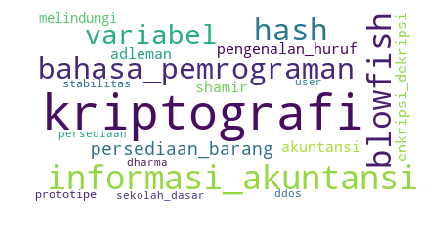

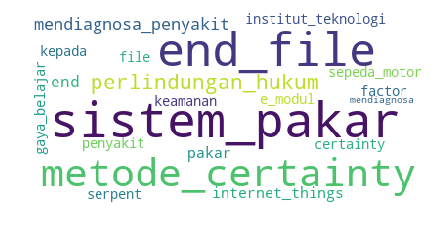

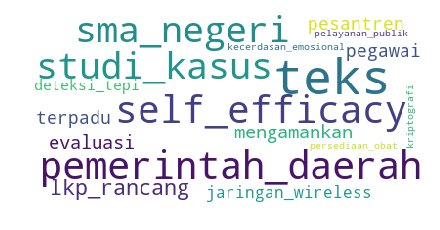

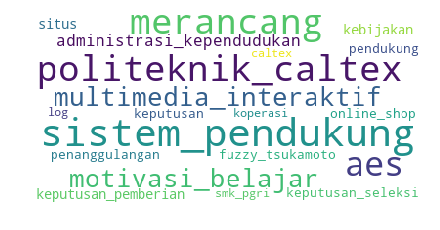

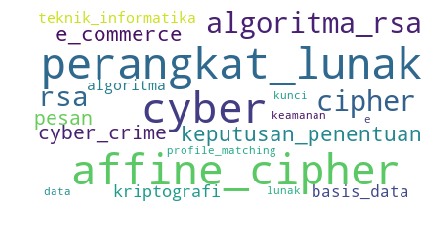

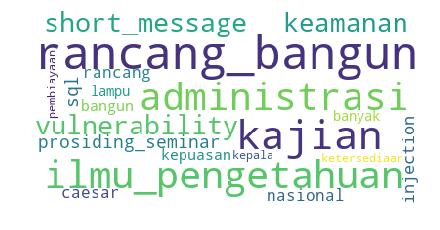

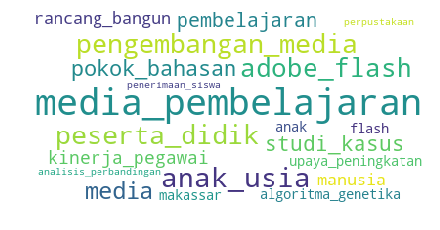

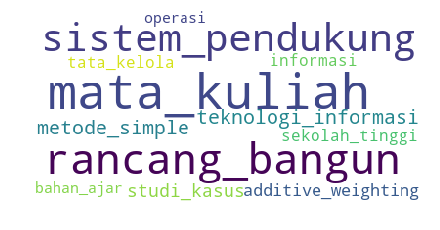

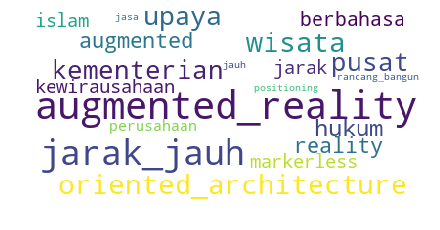

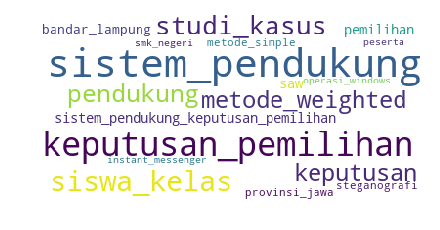

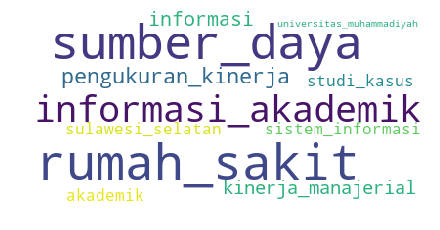

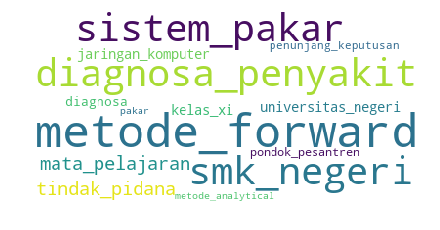

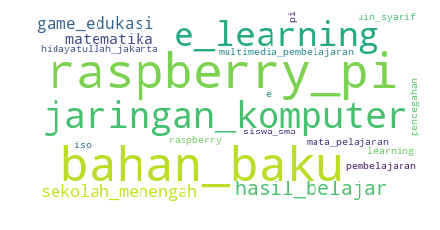

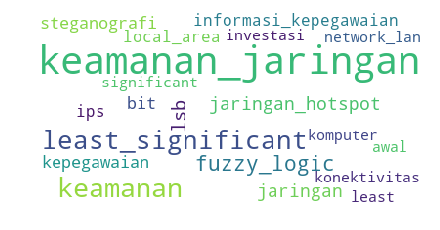

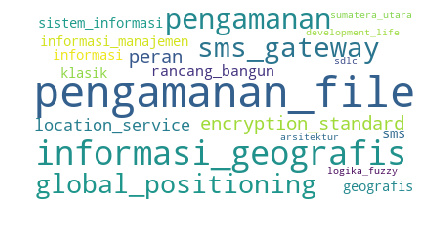

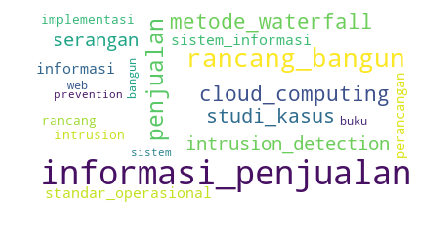

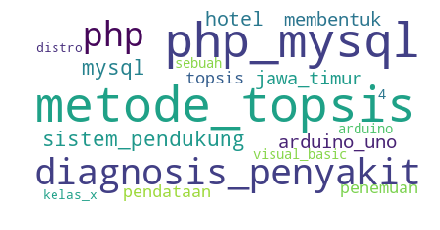

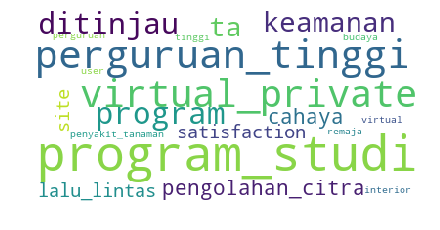

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud as wd

# # lower max_font_size, change the maximum number of word and lighten the background:
# wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

for t in range(model.num_topics):
    plt.figure(figsize=(7,6))
    plt.imshow(wd(max_font_size=50, max_words=20, background_color="white", min_font_size=10).fit_words(dict(model.show_topic(t,200))))
    plt.axis("off")
#     plt.title("Topic #" + str(t))
#     plt.savefig("wcld-topic-"+str(t)+".png", facecolor='k')
#     plt.tight_layout(pad=0)
    plt.savefig("wcld-topic-"+str(t)+".png", facecolor='none', bbox_inches='tight')
    
# plt.show()

In [22]:
import pickle
filename = 'model2017.pkl'
pickle.dump(model, open(filename, 'wb'))
model.save('lda.model')